In [1]:
#https://github.com/miguelfzafra/Latest-News-Classifier/blob/master/0.%20Latest%20News%20Classifier/04.%20Model%20Training/09.%20MT%20-%20MultinomialNB.ipynb

import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
pathPickle = "Pickles"
path_df = pathPickle+"/df.pickle"
with open(path_df, 'rb') as data:
    df = pickle.load(data)

# features_train
path_features_train = pathPickle+"/features_train.pickle"
with open(path_features_train, 'rb') as data:
    features_train = pickle.load(data)

# labels_train
path_labels_train = pathPickle+"/labels_train.pickle"
with open(path_labels_train, 'rb') as data:
    labels_train = pickle.load(data)

# features_test
path_features_test = pathPickle+"/features_test.pickle"
with open(path_features_test, 'rb') as data:
    features_test = pickle.load(data)

# labels_test
path_labels_test = pathPickle+"/labels_test.pickle"
with open(path_labels_test, 'rb') as data:
    labels_test = pickle.load(data)

In [2]:
mnbc = MultinomialNB()
mnbc.fit(features_train, labels_train)
mnbc_pred = mnbc.predict(features_test)
mnbc

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [3]:
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, mnbc.predict(features_train)))
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, mnbc_pred))

The training accuracy is: 
0.8943452380952381
The test accuracy is: 
0.8737373737373737


In [4]:
# Classification report
print("Classification report")
print(classification_report(labels_test,mnbc_pred))

Classification report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.82      0.99      0.90       240
           2       1.00      0.78      0.87       161
           3       0.96      0.97      0.96        90
           4       0.53      0.50      0.52        16
           5       0.80      0.92      0.86        26
           6       0.42      1.00      0.59         5
           7       1.00      0.79      0.88        28
           8       1.00      0.77      0.87        13

    accuracy                           0.87       594
   macro avg       0.73      0.75      0.72       594
weighted avg       0.87      0.87      0.86       594



/home/kelu/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


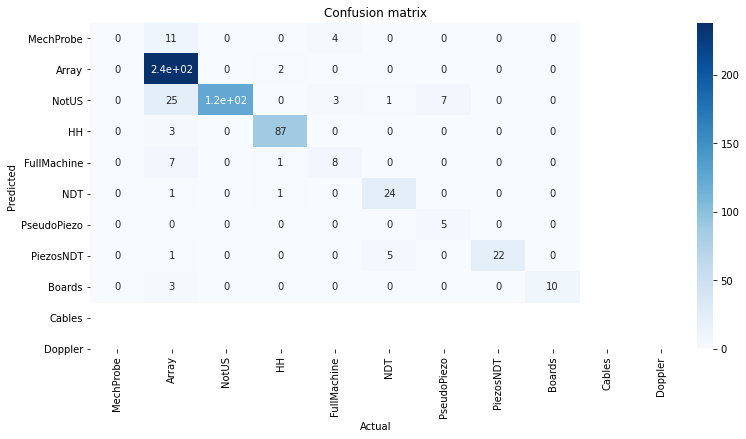

In [5]:
aux_df = df[['group', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, mnbc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['group'].values, 
            yticklabels=aux_df['group'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [6]:
d = {
     'Model': 'Multinomial Naïve Bayes',
     'Training Set Accuracy': accuracy_score(labels_train, mnbc.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, mnbc_pred)
}

df_models_mnbc = pd.DataFrame(d, index=[0])

In [7]:
df_models_mnbc

,Model,Training Set Accuracy,Test Set Accuracy
0,Multinomial Naïve Bayes,0.894345,0.873737


In [8]:
with open('Models/best_mnbc.pickle', 'wb') as output:
    pickle.dump(mnbc, output)
    
with open('Models/df_models_mnbc.pickle', 'wb') as output:
    pickle.dump(df_models_mnbc, output)

# Testing the model

In [9]:
pathPickle = "Pickles"

path_X_train = pathPickle+"/X_train.pickle"
with open(path_X_train, 'rb') as data:
    X_train = pickle.load(data)

# X_test
path_X_test = pathPickle+"/X_test.pickle"
with open(path_X_test, 'rb') as data:
    X_test = pickle.load(data)

# y_train
path_y_train = pathPickle+"/y_train.pickle"
with open(path_y_train, 'rb') as data:
    y_train = pickle.load(data)

# y_test
path_y_test = pathPickle+"/y_test.pickle"
with open(path_y_test, 'rb') as data:
    y_test = pickle.load(data)

path_category_names = pathPickle+"/category_names.pickle"
with open(path_category_names, 'rb') as data:
    category_names = pickle.load(data)
    
path_category_codes = pathPickle+"/category_codes.pickle"
with open(path_category_codes, 'rb') as data:
    category_codes = pickle.load(data)

In [10]:
df.keys()

Index(['ItemID', 'value', '_currencyID', 'ViewItemURLForNaturalSearch',
       'Title', 'PrimaryCategoryID', 'Country', 'Description', 'group',
       'StrPrimaryCategoryID', 'Content', 'Title_Clean', 'Category_Code'],
      dtype='object')

In [11]:
predictions = mnbc.predict(features_test)
# Indexes of the test set
index_X_test = X_test.index
# We get them from the original df
df_test = df.loc[index_X_test]
# Add the predictions
df_test['Prediction'] = predictions
# Clean columns
df_test = df_test[['Title','ItemID',"ViewItemURLForNaturalSearch", 'group', 'Category_Code', 'Prediction']]
# Decode
df_test['Category_Predicted'] = df_test['Prediction']
df_test = df_test.replace({'Category_Predicted':category_names})
# Clean columns again
df_test = df_test[['Title', 'ItemID',"ViewItemURLForNaturalSearch",'group', 'Category_Predicted']]
# Getting differences in results
DIFFERENCES1 = df_test[~(df_test["group"] == df_test["Category_Predicted"])]
DIFFERENCES1

,Title,ItemID,ViewItemURLForNaturalSearch,group,Category_Predicted
3920,"category9886 BMW G30 520dX, Ultraschallsensor ...",184036316778,https://www.ebay.com/itm/BMW-G30-520dX-Ultrasc...,PseudoPiezo,NDT
3009,category32875 Mira Advance Atl Thermostatic 9...,133349943305,https://www.ebay.com/itm/Mira-Advance-Atl-Ther...,NotUS,Array
973,category181989 Panametrics NDT MG2-XT Ultrason...,274191397573,https://www.ebay.com/itm/Panametrics-NDT-MG2-X...,NDT,FullMachine
2366,category181961 Angle Beam Transducer 5MHz 14*1...,223590660363,https://www.ebay.com/itm/Angle-Beam-Transducer...,PiezosNDT,Cables
2010,category57520 Yushi Angle Beam Transducer Sens...,333457255146,https://www.ebay.com/itm/Yushi-Angle-Beam-Tran...,PiezosNDT,Cables
...,...,...,...,...,...
1279,category3179 MEC2.4 UPGRADE MODULE for GE Logi...,233185688727,https://www.ebay.com/itm/MEC2-4-UPGRADE-MODULE...,Boards,Array
1824,category71927 Medison Prestige Ultraschallgerä...,283806099588,https://www.ebay.com/itm/Medison-Prestige-Ultr...,FullMachine,Array
980,category71927 veterinärmedizinischer Ultrascha...,114129373850,https://www.ebay.com/itm/veterinarmedizinische...,HH,Array
2340,category181989 GE DM5E Ultrasonic Thickness Ga...,143529284776,https://www.ebay.com/itm/GE-DM5E-Ultrasonic-Th...,NDT,FullMachine


In [12]:
predictions = mnbc.predict(features_train)
# Indexes of the test set
index_X_test = X_train.index
# We get them from the original df
df_test = df.loc[index_X_test]
# Add the predictions
df_test['Prediction'] = predictions
# Clean columns
df_test = df_test[['Title','ItemID',"ViewItemURLForNaturalSearch", 'group', 'Category_Code', 'Prediction']]
# Decode
df_test['Category_Predicted'] = df_test['Prediction']
df_test = df_test.replace({'Category_Predicted':category_names})
# Clean columns again
df_test = df_test[['Title', 'ItemID',"ViewItemURLForNaturalSearch",'group', 'Category_Predicted']]
# Getting differences in results
DIFFERENCES2 = df_test[~(df_test["group"] == df_test["Category_Predicted"])]
DIFFERENCES2

,Title,ItemID,ViewItemURLForNaturalSearch,group,Category_Predicted
2417,category181961 DIASONICS 7.5 MHz Ultrasound Tr...,253977654347,https://www.ebay.com/itm/DIASONICS-7-5-MHz-Ult...,MechProbe,Array
581,category30816 Ultraschallgerät Toshiba famio5 ...,133333988176,https://www.ebay.com/itm/Ultraschallgerat-Tosh...,FullMachine,Array
1534,category181989 Hocking Locator 2 Handheld Eddy...,254216062475,https://www.ebay.com/itm/Hocking-Locator-2-Han...,NDT,FullMachine
3249,category181989 Olympus Panametrics OmniScan MX...,352941331554,https://www.ebay.com/itm/Olympus-Panametrics-O...,NDT,FullMachine
324,category257874 B K Medical Falcon 2101 Ultraso...,174103174085,https://www.ebay.com/itm/B-K-Medical-Falcon-21...,FullMachine,Array
...,...,...,...,...,...
3426,category33693 Autolite Double Platinum Spark P...,392673283091,https://www.ebay.com/itm/Autolite-Double-Plati...,NotUS,Array
2191,category58235 Olympus 2.25 MHZ Angle Beam Tran...,264269102096,https://www.ebay.com/itm/Olympus-2-25-MHZ-Angl...,PiezosNDT,Cables
620,category213 1979 TOPPS #418 DUTCH LEONARD/WALT...,202919306671,https://www.ebay.com/itm/1979-TOPPS-418-DUTCH-...,NotUS,Array
115,category40004 Aws Snail Wedge 45 Degree For 5/...,233448331899,https://www.ebay.com/itm/Aws-Snail-Wedge-45-De...,PiezosNDT,Cables


In [18]:
diff = pd.concat([DIFFERENCES1,DIFFERENCES2])
diff.to_excel("to_check.xlsx")
diff

,Title,ItemID,ViewItemURLForNaturalSearch,group,Category_Predicted
3920,"category9886 BMW G30 520dX, Ultraschallsensor ...",184036316778,https://www.ebay.com/itm/BMW-G30-520dX-Ultrasc...,PseudoPiezo,NDT
3009,category32875 Mira Advance Atl Thermostatic 9...,133349943305,https://www.ebay.com/itm/Mira-Advance-Atl-Ther...,NotUS,Array
973,category181989 Panametrics NDT MG2-XT Ultrason...,274191397573,https://www.ebay.com/itm/Panametrics-NDT-MG2-X...,NDT,FullMachine
2366,category181961 Angle Beam Transducer 5MHz 14*1...,223590660363,https://www.ebay.com/itm/Angle-Beam-Transducer...,PiezosNDT,Cables
2010,category57520 Yushi Angle Beam Transducer Sens...,333457255146,https://www.ebay.com/itm/Yushi-Angle-Beam-Tran...,PiezosNDT,Cables
...,...,...,...,...,...
3426,category33693 Autolite Double Platinum Spark P...,392673283091,https://www.ebay.com/itm/Autolite-Double-Plati...,NotUS,Array
2191,category58235 Olympus 2.25 MHZ Angle Beam Tran...,264269102096,https://www.ebay.com/itm/Olympus-2-25-MHZ-Angl...,PiezosNDT,Cables
620,category213 1979 TOPPS #418 DUTCH LEONARD/WALT...,202919306671,https://www.ebay.com/itm/1979-TOPPS-418-DUTCH-...,NotUS,Array
115,category40004 Aws Snail Wedge 45 Degree For 5/...,233448331899,https://www.ebay.com/itm/Aws-Snail-Wedge-45-De...,PiezosNDT,Cables


In [15]:
import os
pathimg = "/home/kelu/ultrasound/ebaystrove/images/"

In [16]:
if 0:
    for row in range(len(new)):
        if new.iloc[row]["group"] == "None":
            pathfrom = pathimg + str(new.iloc[row]["ItemID"])
        else:
            pathfrom = pathimg + new.iloc[row]["group"] + "/" + str(new.iloc[row]["ItemID"])
        pathto = pathimg + new.iloc[row]["MyCat"] + "/"

        try:
            os.rename(pathfrom + ".jpg", pathto+str(new.iloc[row]["ItemID"])+".jpg")
        except:
            print("Error on "+str(new.iloc[row]["ItemID"])+".jpg")